<a href="https://colab.research.google.com/github/dartwinshu/dibimbing-introduction-to-machine-learning/blob/main/Dibimbing%20-%20Introduction%20to%20Machine%20Learning%20-%20Part_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install & Load Package

In [ ]:
!pip install scikit-plot
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import pandas untuk pengolahan data tabular
import pandas as pd
# import numpy untuk manipulasi array
import numpy as np
# import matplotlib.pyplot module untuk visualisasi data
import matplotlib.pyplot as plt
# import seaborn untuk visualisasi data lebih mudah
import seaborn as sns

# import train_test_split untuk membuat data train dan data test
from sklearn.model_selection import train_test_split
# import metrics untuk evaluasi model
import sklearn.metrics as metrics
# load linear regression model
from sklearn.linear_model import LinearRegression
# load logistic regression model
from sklearn.linear_model import LogisticRegression
# load StandardScaler untuk standarisasi
from sklearn.preprocessing import MinMaxScaler

# load statsmodel module 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# load scikit-plot modules untuk visualisasi metrik evaluasi
import scikitplot as skplt

# load eli5 untuk visualisasi bobot model
import eli5

# Load Dataset

In [ ]:
# startups_data untuk kasus regresi linier
startups_data = pd.read_csv("https://bit.ly/50startups_dataset")

# turnover_data untuk kasus regresi logistik
turnover_data = pd.read_csv("https://bit.ly/hr_analytics_turnover_data")

In [ ]:
# cek startups_data
startups_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
# cek struktur data startups_data
startups_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
# cek turnover_data
turnover_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# cek struktur data turnover_data
turnover_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# Linear Regression

## Informasi terkait dataset

Dataset berikut adalah sekumpulan data yang dikumpulkan dari berbagai wilayah di US, diantaranya New York, California, dan Florida, yakni sekitar 50 startup . Data ini dikumpulkan dengan tujuan untuk memprediksi keberhasilan suatu startup berdasarkan beberapa variabel sehingga venture capital atau angle investor tahu di perusahaan mana mereka harus menginvestasikan uang mereka. Beberapa variabel yang digunkan dalam analisis diantaranya:

- R&D Spending
- Administration Spending
- Marketing Spending
- State
- Profit (variabel target)

## Data Inspection

In [ ]:
# cek apakah ada dataset yang hilang
startups_data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
# cek nilai unik dari tiap kolom

## ekstrak nama kolom dari dataset
nama_kolom = startups_data.columns

## lakukan iterasi untuk mengecek nilai unik dari tiap kolom
for i in nama_kolom:
  print("Nama kolom: {}".format(i))
  print(startups_data[i].unique())

Nama kolom: R&D Spend
[165349.2  162597.7  153441.51 144372.41 142107.34 131876.9  134615.46
 130298.13 120542.52 123334.88 101913.08 100671.96  93863.75  91992.39
 119943.24 114523.61  78013.11  94657.16  91749.16  86419.7   76253.86
  78389.47  73994.56  67532.53  77044.01  64664.71  75328.87  72107.6
  66051.52  65605.48  61994.48  61136.38  63408.86  55493.95  46426.07
  46014.02  28663.76  44069.95  20229.59  38558.51  28754.33  27892.92
  23640.93  15505.73  22177.74   1000.23   1315.46      0.      542.05]
Nama kolom: Administration
[136897.8  151377.59 101145.55 118671.85  91391.77  99814.71 147198.87
 145530.06 148718.95 108679.17 110594.11  91790.61 127320.38 135495.07
 156547.42 122616.84 121597.55 145077.58 114175.79 153514.11 113867.3
 153773.43 122782.75 105751.03  99281.34 139553.16 144135.98 127864.55
 182645.56 153032.06 115641.28 152701.92 129219.61 103057.49 157693.92
  85047.44 127056.21  51283.14  65947.93  82982.09 118546.05  84710.77
  96189.63 127382.3  154806.1

## Train-Test Splitting

In [ ]:
# memisahkan variabel x dan y dari tabel
X_data = startups_data.drop('Profit', axis = 1)
y_data = startups_data['Profit']

In [ ]:
# cek X_data
X_data.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [ ]:
# cek y_data
y_data.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    # variabel X
    X_data, 
    # variabel target
    y_data, 
    # ukuran test data
    test_size = 0.20, 
    # random state untuk reproducibility
    random_state = 1000
)

In [ ]:
# cek X_train
X_train.head()

,R&D Spend,Administration,Marketing Spend,State
44,22177.74,154806.14,28334.72,California
39,38558.51,82982.09,174999.30,California
49,0.00,116983.80,45173.06,California
16,78013.11,121597.55,264346.06,California
17,94657.16,145077.58,282574.31,New York


In [ ]:
# cek y_train
y_train.head()

44     65200.33
39     81005.76
49     14681.40
16    126992.93
17    125370.37
Name: Profit, dtype: float64

In [ ]:
# cek X_test
X_test.head()

,R&D Spend,Administration,Marketing Spend,State
9,123334.88,108679.17,304981.62,California
34,46426.07,157693.92,210797.67,California
8,120542.52,148718.95,311613.29,New York
42,23640.93,96189.63,148001.11,California
29,65605.48,153032.06,107138.38,New York


In [ ]:
# cek y_test
y_test.head()

9     149759.96
34     96712.80
8     152211.77
42     71498.49
29    101004.64
Name: Profit, dtype: float64

In [ ]:
# masukkan nilai y_train ke dalam X_train sebagai feature "Profit"
X_train['Profit'] = y_train

In [ ]:
# cek X_train
X_train.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
44,22177.74,154806.14,28334.72,California,65200.33
39,38558.51,82982.09,174999.30,California,81005.76
49,0.00,116983.80,45173.06,California,14681.40
16,78013.11,121597.55,264346.06,California,126992.93
17,94657.16,145077.58,282574.31,New York,125370.37


## Exploratory Data Analysis

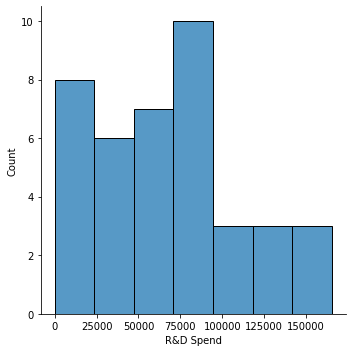

In [ ]:
# variabel 'R&D Spend'
sns.displot(data = X_train, x = 'R&D Spend');

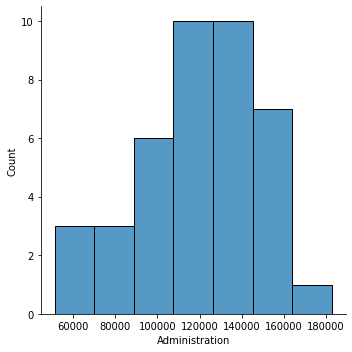

In [ ]:
# variabel 'Administration'
sns.displot(data = X_train, x = 'Administration')

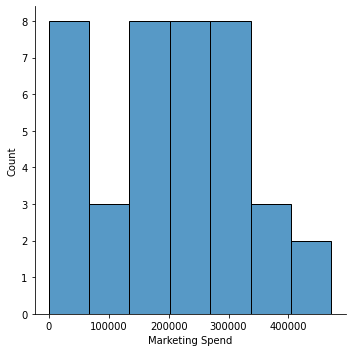

In [ ]:
# variabel 'Marketing Spend'
sns.displot(data = X_train, x = 'Marketing Spend')

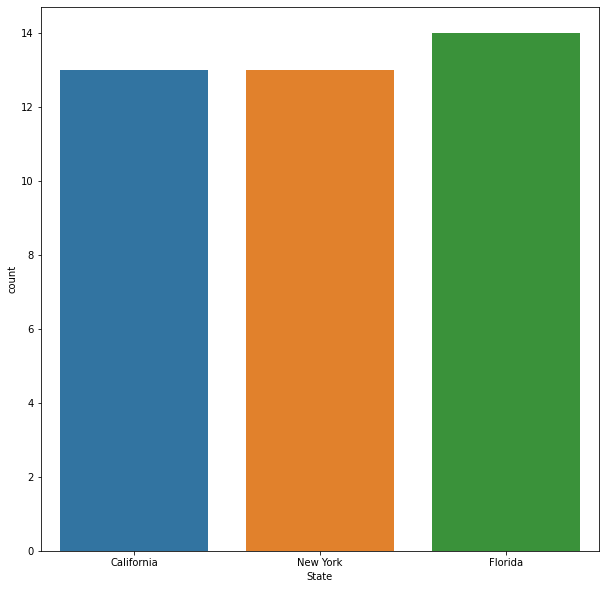

In [ ]:
# variabel 'State'
sns.countplot(data = X_train, x = "State")

In [ ]:
# membuat dummy variabel dari variabel kategorik pada X_train
X_train = pd.get_dummies(X_train, drop_first = True)

In [ ]:
# membuat dummy variabel dari variabel kategorik pada X_test
X_test = pd.get_dummies(X_test, drop_first = True)

In [ ]:
# mengubah posisi variabel target ('Profit')
profit_col = X_train.pop('Profit')
X_train = pd.concat([X_train, profit_col], 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


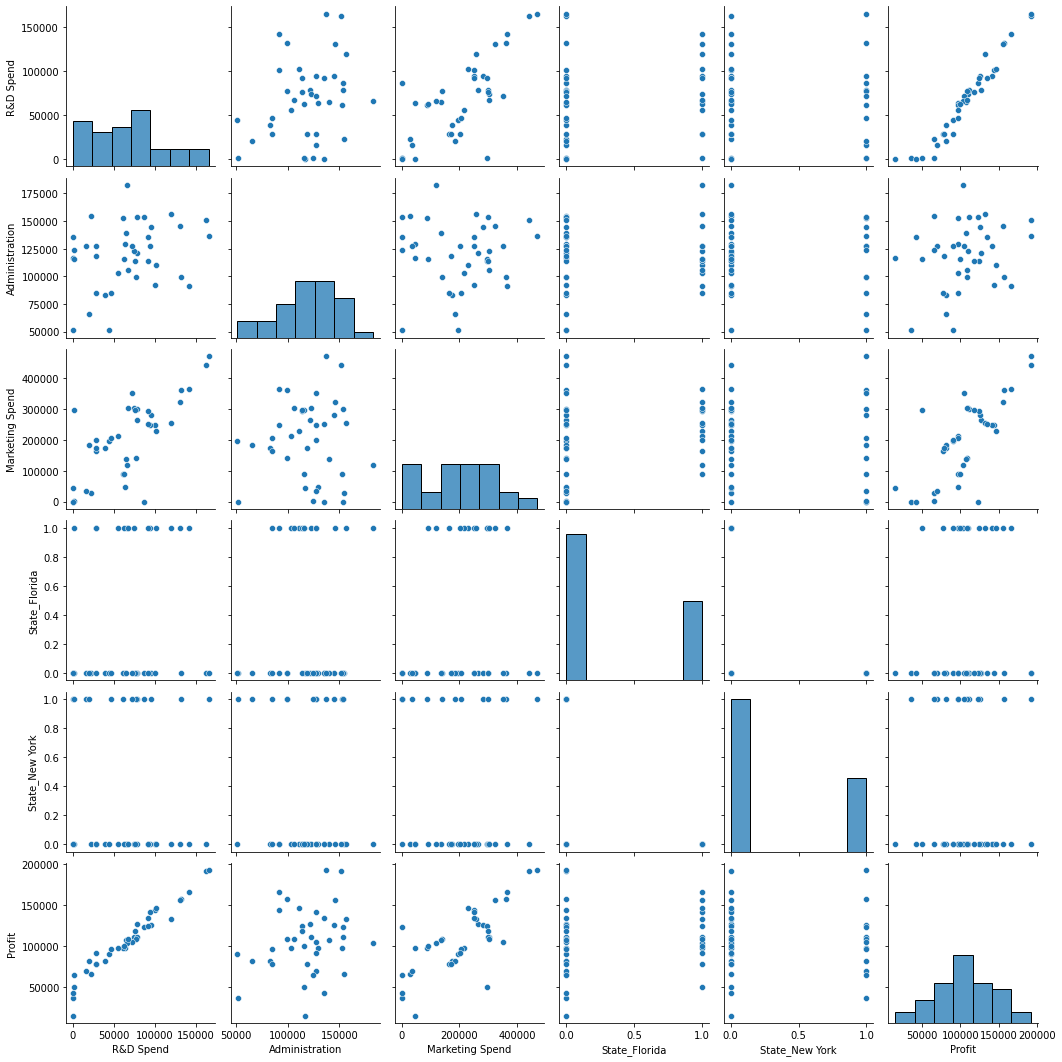

In [ ]:
# visualisasikan pairplot dari X_train
sns.pairplot(data = X_train)

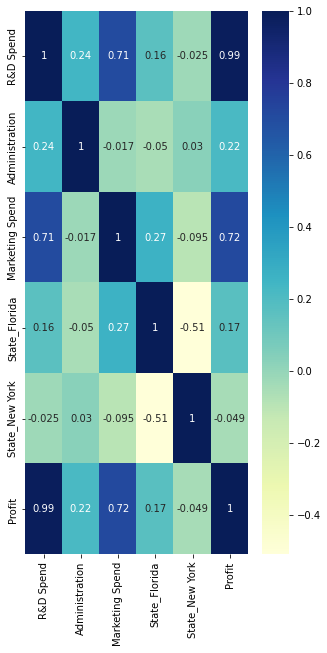

In [ ]:
# visualisasikan correlation matrix dari X_train menggunakan
# korelasi Spearman
sns.heatmap(X_train.corr(method="spearman"), cmap="YlGnBu", annot=True)

In [ ]:
# buang kolom 'Profit' dari X_train
X_train = X_train.drop('Profit', axis = 1)

In [ ]:
# cek struktur data X_train
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 44 to 23
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        40 non-null     float64
 1   Administration   40 non-null     float64
 2   Marketing Spend  40 non-null     float64
 3   State_Florida    40 non-null     uint8  
 4   State_New York   40 non-null     uint8  
dtypes: float64(3), uint8(2)
memory usage: 2.4 KB


## Modeling

LinearRegression parameter
```python
sklearn.linear_model.LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
```
Untuk penjelasan lebih lanjut dari tiap parameter, cek: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 

In [ ]:
# definisikan model regresi linear
linreg_model = LinearRegression()
# fit model dengan data
linreg_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# hasilkan prediksi dari linreg_model menggunakan data X_test
linreg_result = linreg_model.predict(X_test)

## Model Evaluation

In [ ]:
# Evaluasi model linear regression
linreg_model.score(X_test,y_test)

0.9568862358477391

In [ ]:
# Evaluasi model linear regression
metrics.mean_squared_error(y_test, linreg_result)

59996166.742804065

In [ ]:
# evaluasi model linear regression
metrics.mean_absolute_percentage_error(y_test, linreg_result) * 100

4.64138024555755

## Model Interpretation

In [ ]:
# membuat dataframe berisi nama feature dan koefisiennya
feature_weight = pd.DataFrame(
    {
     "var_name" : X_train.columns.tolist() + ["Intercept"], 
     "coef" : linreg_model.coef_.tolist() + [linreg_model.intercept_]
    }
)

# cek bobot feature
feature_weight

,var_name,coef
0,R&D Spend,0.824334
1,Administration,-0.031555
2,Marketing Spend,0.018013
3,State_Florida,358.084797
4,State_New York,585.803388
5,Intercept,51049.558824


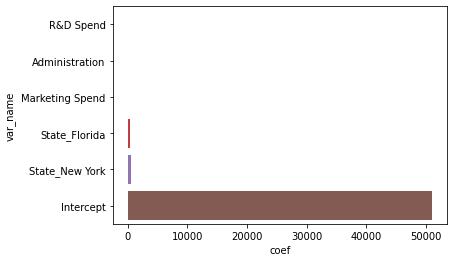

In [ ]:
# visualisasikan koefisien model menggunakan barplot
sns.barplot(data = feature_weight, y = "var_name", x = "coef");

In [ ]:
# membuat dataframe berisi nama feature dan koefisiennya tanpa intercept
feature_weight = pd.DataFrame(
    {"var_name" : X_train.columns.tolist(), 
     "coef" : linreg_model.coef_.tolist()
     }
)

# cek feature dan bobotnya
feature_weight

,var_name,coef
0,R&D Spend,0.824334
1,Administration,-0.031555
2,Marketing Spend,0.018013
3,State_Florida,358.084797
4,State_New York,585.803388


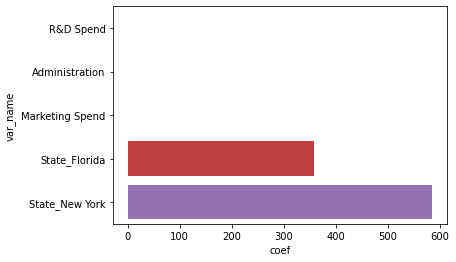

In [ ]:
# visualisasikan koefisien model menggunakan barplot
sns.barplot(data = feature_weight, y = "var_name", x = "coef");

## Latihan

Cek asumsi dari model regresi linear dan cek apakah semua asumsi terpenuhi atau tidak dengan melengkapi kode berikut

**Asumsi 1**

Hubungan linier antara variabel bebas dengan variabel target

In [ ]:
sns.pairplot(data = ____)

**Asumsi 2**

Residual berdistribusi normal

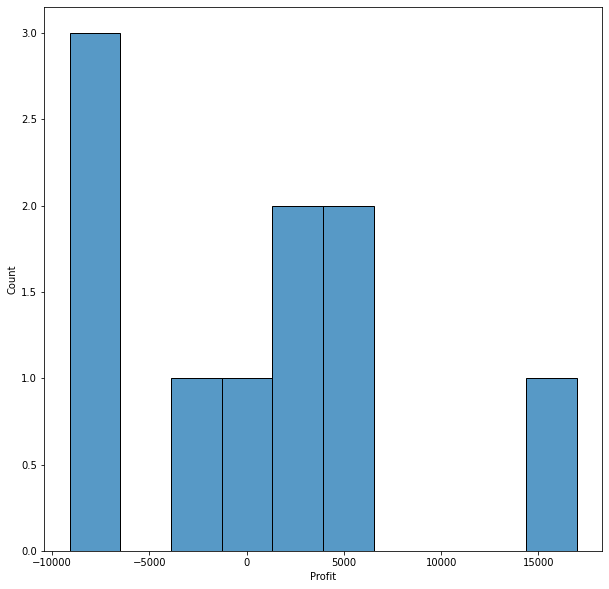

In [ ]:
resid = linreg_result - y_test
sns.histplot(___, bins=10)

**Asumsi 3**

Tidak ada korelasi antara residual dengan variabel target

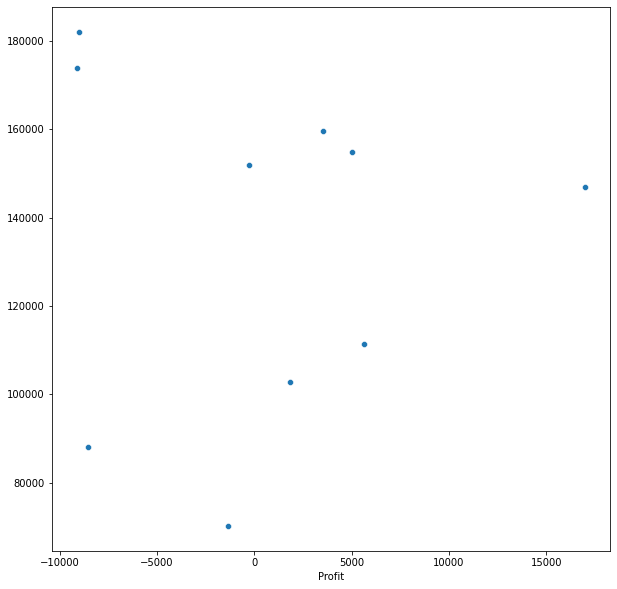

In [ ]:
sns.___(x=resid, y=linreg_result)

**Asumsi 4**

Residual memiliki variansi konstan

In [ ]:
sns.___(x=resid, y=linreg_result)

**Asumsi 5**

Tidak ada multikolinearitas

In [ ]:
sns.____(data = ____)

## Latihan

Perhatikan bahwa nilai numerik pada X_train memiliki variansi yang berbeda-beda, sehingga standarisasi perlu dilakukan. Lakukan standarisasi pada X_train dan X_test lalu modelkan ulang dan lihat apakah terdapat hasil yang berbeda dari model sebelumnya.

In [ ]:
# definisikan MinMaxScaler
scaler = MinMaxScaler()
# fit scaler dengan X_train
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
# transformasikan X_train menggunakan scaler
X_train_new = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)

In [ ]:
# cek X_train_new
X_train_new.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,0.134127,0.788072,0.060059,0.0,0.0
1,0.233194,0.241309,0.370931,0.0,0.0
2,0.000000,0.500148,0.095749,0.0,0.0
3,0.471808,0.535270,0.560312,0.0,0.0
4,0.572468,0.714013,0.598948,0.0,1.0


In [ ]:
# transformasikan X_test menggunakan scaler dari X_train
X_test_new = pd.DataFrame(scaler.____(X_test), columns=____.columns)

In [ ]:
# cek X_test_new
X_test_new.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,0.745906,0.436929,0.646443,0.0,0.0
1,0.280776,0.810055,0.446810,0.0,0.0
2,0.729018,0.741733,0.660500,0.0,1.0
3,0.142976,0.341852,0.313705,0.0,0.0
4,0.396769,0.774566,0.227092,0.0,1.0


In [ ]:
# definisikan model regresi linear
linreg_model = ____()
# fit model dengan data
linreg_model.fit(____, y_train)
# hasilkan prediksi dari linreg_model menggunakan data X_test
linreg_result = linreg_model.predict(____)

In [ ]:
# Evaluasi model linear regression menggunakan R-square
linreg_model.____(X_test_new, y_test)

0.9568862358477688

In [ ]:
# Evaluasi model linear regression menggunakan MSE
metrics.____(y_test, linreg_result)

59996166.74276273

In [ ]:
# evaluasi model linear regression menggunakan mape
metrics.____(y_test, linreg_result) * ___

4.641380245554777

In [ ]:
# membuat dataframe berisi nama feature dan koefisiennya
feature_weight = pd.DataFrame(
    {
     "var_name" : ____.columns.tolist() + ["Intercept"], 
     "coef" : linreg_model.coef_.tolist() + [linreg_model.intercept_]
    }
)

# cek bobot feature
feature_weight

,var_name,coef
0,R&D Spend,136302.936765
1,Administration,-4145.159740
2,Marketing Spend,8498.417643
3,State_Florida,358.084797
4,State_New York,585.803388
5,Intercept,49431.312089


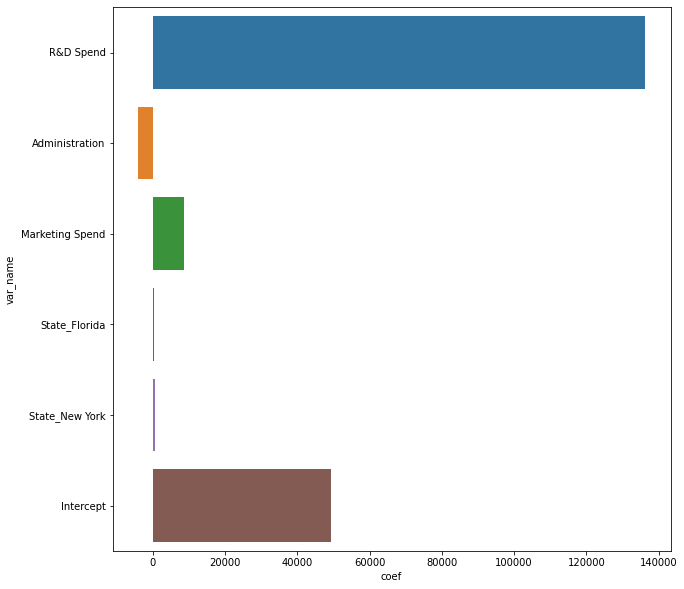

In [ ]:
# visualisasikan koefisien model menggunakan barplot
sns.____(data = ____, y = "var_name", x = "coef");

# Logistic Regression

## Informasi terkait dataset

Dataset berikut adalah sekumpulan data yang dikumpulkan dari karyawan di suatu perusahaan yang diperoleh dari kuesioner dan laporan HR. Dari data ini, perusahaan ingin mengetahui apakah kita bisa memprediksi mana karyawan yang berpotensi akan keluar dan mana yang tidak. Beberapa variabel yang digunakan dalam analisis diantaranya:

- Satisfaction Level
- Last Evaluation
- Number Project
- Average Monthly Hours
- Time Spend Company
- Work Accident
- Promotion Last 5 Years
- Sales
- Salary
- Left (Target)

## Data Inspection

In [ ]:
# cek apakah ada dataset yang hilang
turnover_data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [ ]:
# cek nilai unik dari tiap kolom

## ekstrak nama kolom dari dataset
nama_kolom = turnover_data.columns

## lakukan iterasi untuk mengecek nilai unik dari tiap kolom
for i in nama_kolom:
  print("Nama kolom: {}".format(i))
  print(turnover_data[i].unique())

Nama kolom: satisfaction_level
[0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]
Nama kolom: last_evaluation
[0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]
Nama kolom: number_project
[2 5 7 6 4 3]
Nama kolom: average_montly_hours
[157 262 272 223 159 153 247 259 224 142 135 305 234 148 137 143 160 255


## Train-Test Split

In [ ]:
# memisahkan variabel x dan y dari tabel
X_data = turnover_data.drop('left', axis = 1)
y_data = turnover_data['left']

In [ ]:
# cek X_data
X_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [ ]:
# cek y_data
y_data.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    # variabel X
    X_data, 
    # variabel target
    y_data, 
    # ukuran test data
    test_size = 0.20, 
    # random state untuk reproducibility
    random_state = 1000
)

In [ ]:
# cek X_train
X_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
10756,0.31,0.51,2,146,3,0,0,RandD,low
589,0.39,0.54,2,155,3,0,0,support,low
4017,0.69,0.91,4,186,3,0,0,support,low
94,0.09,0.83,6,255,4,0,0,sales,low
2304,0.51,0.53,3,201,2,0,0,sales,low


In [ ]:
# cek y_train
y_train.head()

10756    0
589      1
4017     0
94       1
2304     0
Name: left, dtype: int64

In [ ]:
# cek X_test
X_test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
2604,0.85,0.78,4,251,3,0,0,sales,medium
6313,0.24,0.73,4,273,5,0,0,support,low
13163,0.19,0.94,4,196,5,0,0,technical,low
720,0.42,0.49,2,139,3,0,0,hr,low
5100,0.76,0.44,3,121,4,0,0,IT,low


In [ ]:
# cek y_test
y_test.head()

2604     0
6313     0
13163    0
720      1
5100     0
Name: left, dtype: int64

In [ ]:
# masukkan y_train ke dalam X_train sebagai kolom "left"
X_train['left'] = y_train

In [ ]:
# cek X_train
X_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
10756,0.31,0.51,2,146,3,0,0,RandD,low,0
589,0.39,0.54,2,155,3,0,0,support,low,1
4017,0.69,0.91,4,186,3,0,0,support,low,0
94,0.09,0.83,6,255,4,0,0,sales,low,1
2304,0.51,0.53,3,201,2,0,0,sales,low,0


## Exploratory Data Analysis

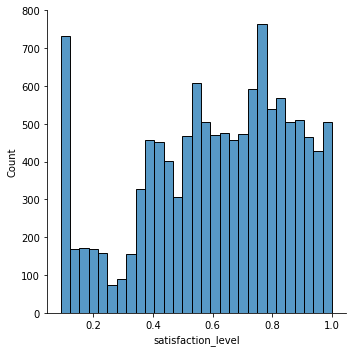

In [ ]:
# variabel 'Satisfaction Level'
sns.displot(data = X_train, x = 'satisfaction_level');

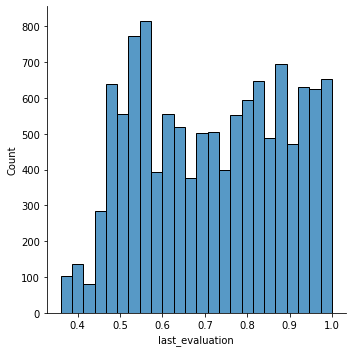

In [ ]:
# variabel 'Last Evaluation'
sns.displot(data = X_train, x = 'last_evaluation')

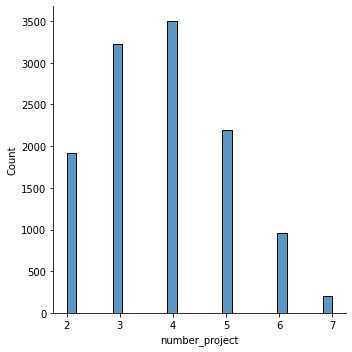

In [ ]:
# variabel 'Number Project'
sns.displot(data = X_train, x = 'number_project')

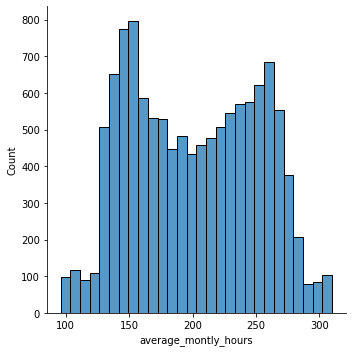

In [ ]:
# variabel 'Average Monthly Hours'
sns.displot(data = X_train, x = 'average_montly_hours')

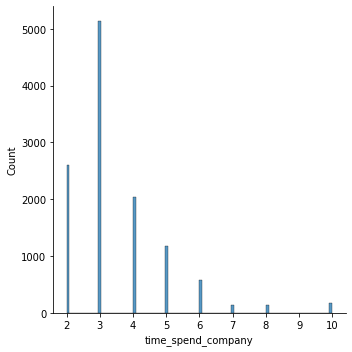

In [ ]:
# variabel 'Average Monthly Hours'
sns.displot(data = X_train, x = 'time_spend_company')

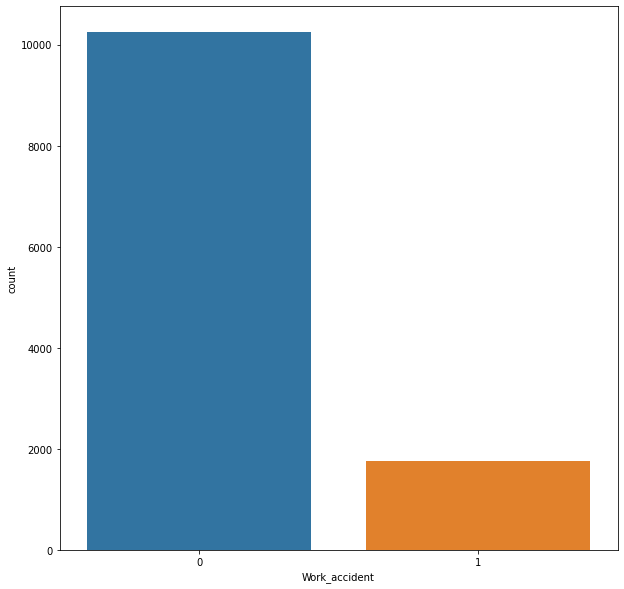

In [ ]:
# variabel 'Work_accident'
sns.countplot(data = X_train, x = "Work_accident")

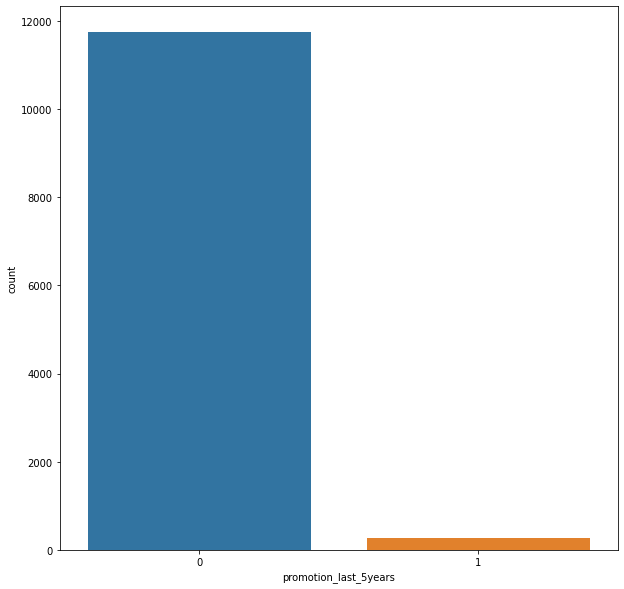

In [ ]:
# variabel 'promotion_last_5years'
sns.countplot(data = X_train, x = "promotion_last_5years")

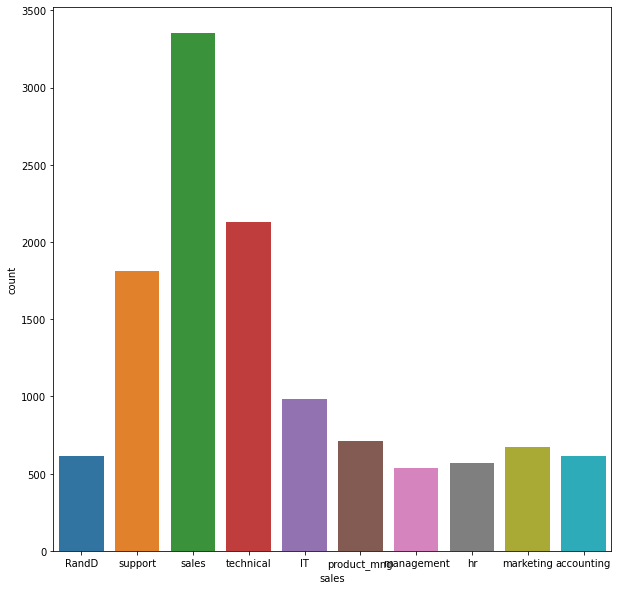

In [ ]:
# variabel 'sales'
sns.countplot(data = X_train, x = "sales")

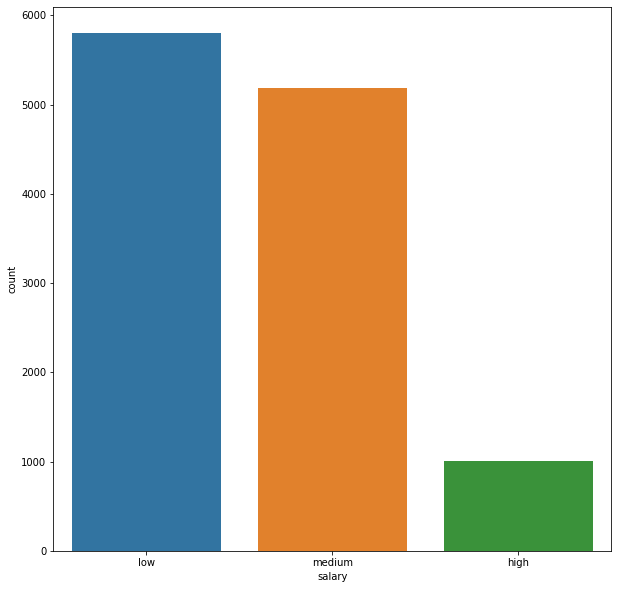

In [ ]:
# variabel 'salary'
sns.countplot(data = X_train, x = "salary")

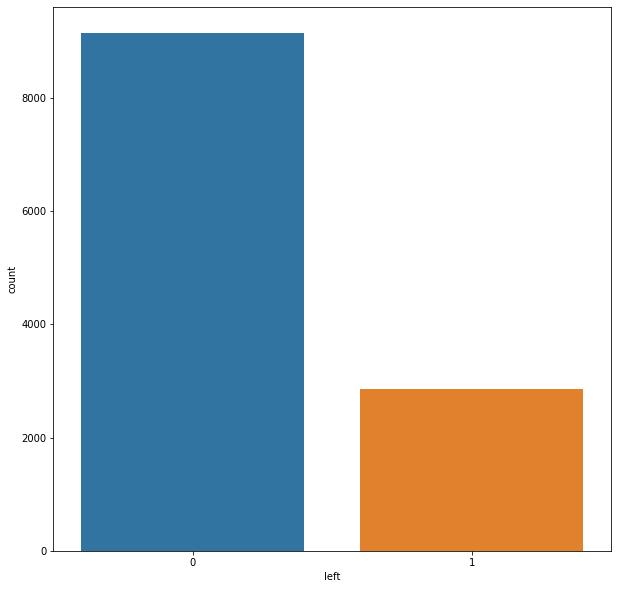

In [ ]:
# variabel 'left'
sns.countplot(data = X_train, x = "left")

In [ ]:
# membuat dummy variabel dari variabel kategorik pada X_train
X_train = pd.get_dummies(X_train, drop_first = True)

In [ ]:
# membuat dummy variabel dari variabel kategorik pada X_test
X_test = pd.get_dummies(X_test, drop_first = True)

In [ ]:
# mengubah posisi variabel target ('left')
left_col = X_train.pop('left')
X_train = pd.concat([X_train, left_col], 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# cek struktur data X_train
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11999 entries, 10756 to 9651
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11999 non-null  float64
 1   last_evaluation        11999 non-null  float64
 2   number_project         11999 non-null  int64  
 3   average_montly_hours   11999 non-null  int64  
 4   time_spend_company     11999 non-null  int64  
 5   Work_accident          11999 non-null  int64  
 6   promotion_last_5years  11999 non-null  int64  
 7   sales_RandD            11999 non-null  uint8  
 8   sales_accounting       11999 non-null  uint8  
 9   sales_hr               11999 non-null  uint8  
 10  sales_management       11999 non-null  uint8  
 11  sales_marketing        11999 non-null  uint8  
 12  sales_product_mng      11999 non-null  uint8  
 13  sales_sales            11999 non-null  uint8  
 14  sales_support          11999 non-null  uint8  
 15 

In [ ]:
# cek struktur data X_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 2604 to 11305
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     3000 non-null   float64
 1   last_evaluation        3000 non-null   float64
 2   number_project         3000 non-null   int64  
 3   average_montly_hours   3000 non-null   int64  
 4   time_spend_company     3000 non-null   int64  
 5   Work_accident          3000 non-null   int64  
 6   promotion_last_5years  3000 non-null   int64  
 7   sales_RandD            3000 non-null   uint8  
 8   sales_accounting       3000 non-null   uint8  
 9   sales_hr               3000 non-null   uint8  
 10  sales_management       3000 non-null   uint8  
 11  sales_marketing        3000 non-null   uint8  
 12  sales_product_mng      3000 non-null   uint8  
 13  sales_sales            3000 non-null   uint8  
 14  sales_support          3000 non-null   uint8  
 15  

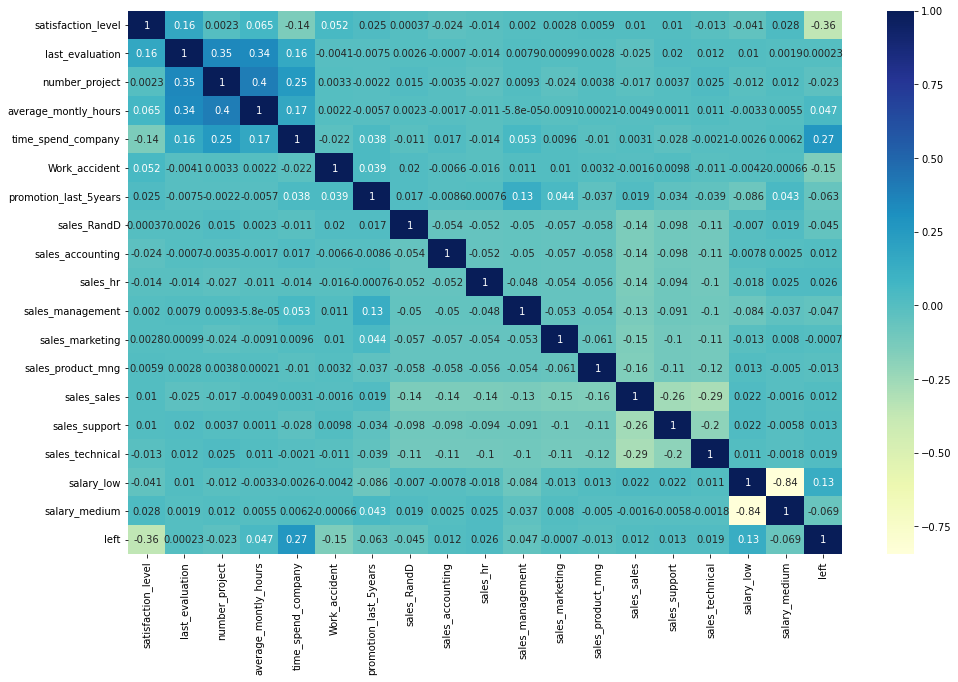

In [ ]:
# visualisasikan correlation matrix dari X_train menggunakan korelasi Spearman
plt.figure(figsize=(16,10))
sns.heatmap(X_train.corr(method='spearman'), cmap="YlGnBu", annot=True)

In [ ]:
# buang variabel 'left' dari X_train
X_train = X_train.drop('left', axis = 1)

In [ ]:
# cek struktur data X_train
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11999 entries, 10756 to 9651
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11999 non-null  float64
 1   last_evaluation        11999 non-null  float64
 2   number_project         11999 non-null  int64  
 3   average_montly_hours   11999 non-null  int64  
 4   time_spend_company     11999 non-null  int64  
 5   Work_accident          11999 non-null  int64  
 6   promotion_last_5years  11999 non-null  int64  
 7   sales_RandD            11999 non-null  uint8  
 8   sales_accounting       11999 non-null  uint8  
 9   sales_hr               11999 non-null  uint8  
 10  sales_management       11999 non-null  uint8  
 11  sales_marketing        11999 non-null  uint8  
 12  sales_product_mng      11999 non-null  uint8  
 13  sales_sales            11999 non-null  uint8  
 14  sales_support          11999 non-null  uint8  
 15 

## Modeling

LogisticRegression param:
```python
sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
```
For further explanation, check: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
# definisikan model regresi logistik
logreg_model = LogisticRegression(penalty='none')
# fit model dengan data X_train dan y_train
logreg_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(penalty='none')

In [ ]:
# hasilkan hard prediction dari logreg_model menggunakan X_test
logreg_result = logreg_model.predict(X_test)
# hasilkan probability prediction dari logref_model menggunakan X_test
logreg_proba = logreg_model.predict_proba(X_test)

In [ ]:
# melihat nilai dari logreg_result
logreg_result

array([0, 1, 1, ..., 0, 0, 0])

In [ ]:
# melihat nilai dari logreg_proba
logreg_proba

array([[0.92326915, 0.07673085],
       [0.2075712 , 0.7924288 ],
       [0.21398139, 0.78601861],
       ...,
       [0.65040392, 0.34959608],
       [0.95836035, 0.04163965],
       [0.98088069, 0.01911931]])

## Model Evaluation

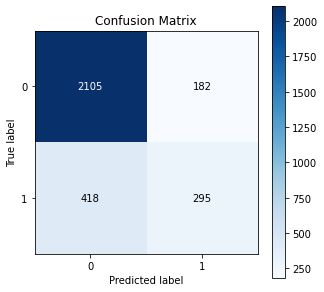

In [ ]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, logreg_result, figsize=(5,5));

In [ ]:
# Evaluasi model logistic regression
pd.DataFrame(metrics.classification_report(y_test, logreg_result, target_names = ['Not Left', 'Left'], output_dict=True))

,Not Left,Left,accuracy,macro avg,weighted avg
precision,0.834324,0.618449,0.8,0.726386,0.783018
recall,0.920420,0.413745,0.8,0.667082,0.800000
f1-score,0.875260,0.495798,0.8,0.685529,0.785075
support,2287.000000,713.000000,0.8,3000.000000,3000.000000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


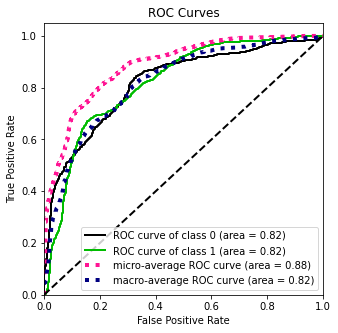

In [ ]:
# Evaluasi model logistic regression menggunakan ROC AUC
skplt.metrics.plot_roc_curve(y_test, logreg_proba, figsize=(5,5));

## Model Interpretation

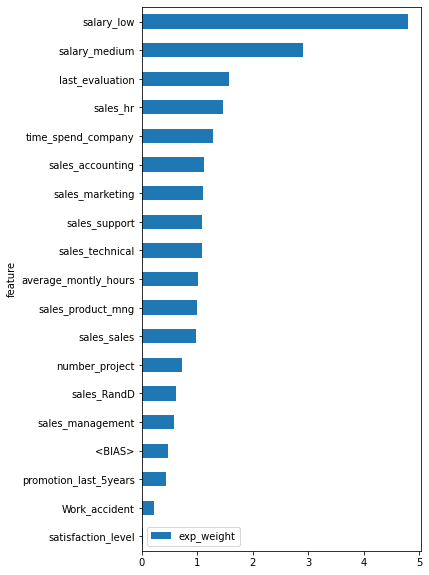

In [ ]:
# visualisasikan feature dan bobotnya
eli5.explain_weights_df(
    logreg_model, feature_names= X_train.columns.tolist()
).assign(
    # buat kolom baru dengan nama exp_weight
    # berdasarkan exp(weight)
    exp_weight = lambda x: x['weight'].map(lambda x: np.exp(x))
).sort_values(
    # urutkan tabel berdasarkan exp_weight terbesar
    by = "exp_weight"
).plot(
    # visualisasikan sebagai barplot horizontal
    x = 'feature',
    y = 'exp_weight',
    kind = 'barh',
    figsize=(5,10)
)